In [1]:
import pandas as pd
from tqdm import tqdm
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [39]:
cv2t=1/10

def evolve(tmax,tr,p):
    if tr>tmax:
        tr=tr-tmax
        p=p*np.exp(-gp*tmax)
        
    else:
        tt=tmax
        while tt>tr:
            tt=tt-tr
            p=p*np.exp(-gp*tr)
            p=p+np.random.exponential(1)
            tr=-(1/kr)*np.log(np.random.rand())
        tr=tr-tt
        p=p*np.exp(-gp*tt)
    return p,tr


In [40]:
t=0
dt=0.001
s=0
data=[[t,p]]
lamb=1
tmax=4
kr=100
gp=10
tr=-(1/kr)*np.log(np.random.rand())
p=0
while t<tmax:
    #print(tr,p)
    p,tr=evolve(tmax=dt,tr=tr,p=p)
    
    t+=dt
    data.append([t,p])
    #print(s,t)

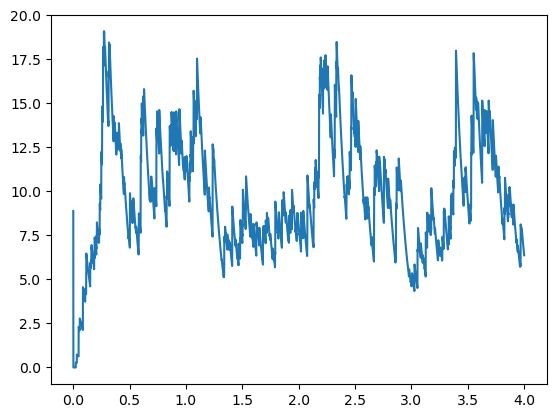

In [41]:
df=pd.DataFrame(data,columns=['Time','Protein'])
plt.plot(df.Time,df.Protein)

In [63]:

dt=0.01
data=[]
for i in tqdm(range(1000)):
    t=0
    p=0
    data.append([i,t,p])
    lamb=1
    tmax=10
    kr=10
    gp=1
    tr=-(1/kr)*np.log(np.random.rand())
    p=0
    while t<tmax:
        #print(tr,p)
        p,tr=evolve(tmax=dt,tr=tr,p=p)

        t+=dt
        data.append([i,t,p])

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 240.86it/s]


In [64]:
df=pd.DataFrame(data,columns=['Cell','Time','Protein'])
df.to_csv('SimSHS.csv',index=False)

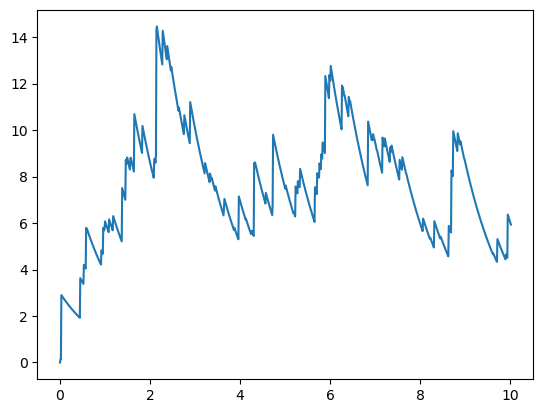

In [65]:

dfcell=df[df.Cell==11]
plt.plot(dfcell.Time,dfcell.Protein)

In [66]:
data=[]
for time in df.Time.unique():
    dft= df[df.Time==time]
    mnp=np.mean(dft.Protein)
    varp=np.var(dft.Protein)
    data.append([time,mnp,varp])
df=pd.DataFrame(data,columns=['Time','MeanP','VarP'])

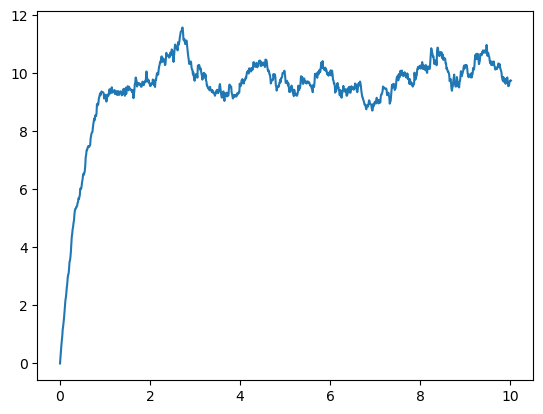

In [67]:
plt.plot(df.Time,df.VarP)